### Importação do banco e bibliotecas (Projeto em andamento)

In [826]:
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

df = pd.read_csv("IDESP_10_anos.csv", sep=";", on_bad_lines="skip")
sns.set_style('whitegrid')

In [827]:
df.head(2)

,CODIGO CIE,CODIGO INEP,DIRETORIA,ESCOLA,MUNICIPIO,NIVEL ENSINO,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022
0,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,"1,37","1,86","1,75","1,92",...,"1,79",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ANOS FINAIS,"2,9","2,91","2,59","2,42",...,"2,29","2,64","3,13","3,18","3,26","4,2","4,23","4,86","3,55","4,25"


### 0. Análise do problema

Meu objetivo é responder as seguintes perguntas:

A. Os dados foram devidamente coletados ao longo dessa década? \
B. Houve uma melhora significativa na média geral durante a década analisada? \
C. Qual categoria (anos iniciais, finais e ensino médio) com o melhor e pior índice de educação? \
D. Quais escolas ficaram acima da média ao longo dos anos? \
E. Quais escolas performaram abaixo da média ao longo dos anos?

Sugiro também que o IDESP passe a divulgar a quantidade de alunos avaliados no cálculo do índice por escola. A ausência dessa informação dificulta a interpretação das médias entre unidades escolares. Uma escola com 100 alunos e outra com 500 alunos podem ter médias idênticas, embora, neste último caso, possa acontecer que o número absoluto de estudantes em situação de baixo desempenho seja muito maior, o que altera a leitura do impacto educacional do índice.

### 1. Limpeza e organização dos dados

Conversão do formato de Wide para Long, ajuste nos tipos de dados e ajuste nos nomes das colunas

In [828]:
df_bckp = df.copy()
df_bckp.head(2)

,CODIGO CIE,CODIGO INEP,DIRETORIA,ESCOLA,MUNICIPIO,NIVEL ENSINO,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022
0,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,"1,37","1,86","1,75","1,92",...,"1,79",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ANOS FINAIS,"2,9","2,91","2,59","2,42",...,"2,29","2,64","3,13","3,18","3,26","4,2","4,23","4,86","3,55","4,25"


In [829]:
# CONVERSÃO DE WIDE PARA LONG. Criei uma coluna para 'Ano' com as médias de cada ano por escola em 'Media Idesp'
df_bckp = df_bckp.melt(id_vars=['CODIGO CIE', 'CODIGO INEP', 'DIRETORIA', 'ESCOLA', 'MUNICIPIO', 'NIVEL ENSINO'], #linhas fixas
    var_name="ANO",
    value_name='MEDIA IDESP')

# CONVERSÃO DE TIPOS
df_bckp['MEDIA IDESP'] = df_bckp['MEDIA IDESP'].str.replace(",",".").astype('float')
df_bckp['ANO'] = df_bckp['ANO'].astype('int')

Esse é o novo formato e os novos tipos de dado convertidos:

In [830]:
df_bckp.head(1)

,CODIGO CIE,CODIGO INEP,DIRETORIA,ESCOLA,MUNICIPIO,NIVEL ENSINO,ANO,MEDIA IDESP
0,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,2007,1.37


In [831]:
df_bckp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153750 entries, 0 to 153749
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CODIGO CIE    153750 non-null  int64  
 1   CODIGO INEP   153750 non-null  int64  
 2   DIRETORIA     153750 non-null  object 
 3   ESCOLA        153750 non-null  object 
 4   MUNICIPIO     153750 non-null  object 
 5   NIVEL ENSINO  153750 non-null  object 
 6   ANO           153750 non-null  int64  
 7   MEDIA IDESP   133232 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 9.4+ MB


In [834]:

df_bckp = df_bckp.rename(columns={'CODIGO CIE': 'CODIGO_ESCOLA', 
                                  'ESCOLA':'NOME_ESCOLA', 
                                  'DIRETORIA':'NOME_DIRETORIA',
                                   'CODIGO INEP': 'CODIGO_INEP',
                                   'MUNICIPIO':'NOME_MUNICIPIO',
                                   'MEDIA IDESP':'MEDIA_IDESP', 
                                   'NIVEL ENSINO': 'NIVEL_ENSINO'})

colunas_ordenadas = ['ANO','CODIGO_ESCOLA', 'CODIGO_INEP', 'NOME_DIRETORIA', 'NOME_ESCOLA', 'NOME_MUNICIPIO', 'NIVEL_ENSINO', 'MEDIA_IDESP']
df_bckp = df_bckp[colunas_ordenadas]

df_bckp.head()

,ANO,CODIGO_ESCOLA,CODIGO_INEP,NOME_DIRETORIA,NOME_ESCOLA,NOME_MUNICIPIO,NIVEL_ENSINO,MEDIA_IDESP
0,2007,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,1.37
1,2007,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ANOS FINAIS,2.90
2,2007,24,35000024,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO ...,SAO PAULO,ENSINO MEDIO,1.32
3,2007,24,35000024,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO ...,SAO PAULO,ANOS FINAIS,2.52
4,2007,24,35000024,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO ...,SAO PAULO,ANOS INICIAIS,2.88


### 2. Engenharia de atributos 

### 3. Análise exploratória dos dados

In [835]:
print(f"###### Informações gerais #####\n") 
df_bckp.info()

print(f"\n###### Contagem de nulos por categoria #####") 
df_bckp.groupby("NIVEL_ENSINO")["MEDIA_IDESP"].apply(lambda x: x.isnull().sum())


###### Informações gerais #####

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153750 entries, 0 to 153749
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ANO             153750 non-null  int64  
 1   CODIGO_ESCOLA   153750 non-null  int64  
 2   CODIGO_INEP     153750 non-null  int64  
 3   NOME_DIRETORIA  153750 non-null  object 
 4   NOME_ESCOLA     153750 non-null  object 
 5   NOME_MUNICIPIO  153750 non-null  object 
 6   NIVEL_ENSINO    153750 non-null  object 
 7   MEDIA_IDESP     133232 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 9.4+ MB

###### Contagem de nulos por categoria #####


NIVEL_ENSINO
ANOS FINAIS      5862
ANOS INICIAIS    9447
ENSINO MEDIO     5209
Name: MEDIA_IDESP, dtype: int64

In [ ]:
df_bckp_iniciais = df_bckp[(df_bckp['NIVEL ENSINO'] == 'ANOS INICIAIS')].groupby('ANO')['MEDIA IDESP'].mean()
df_bckp_finais = df_bckp[(df_bckp['NIVEL ENSINO'] == 'ANOS FINAIS')].groupby('ANO')['MEDIA IDESP'].mean() 
df_bckp_medio = df_bckp[(df_bckp['NIVEL ENSINO'] == 'ENSINO MEDIO')].groupby('ANO')['MEDIA IDESP'].mean() 
#Dependendo da quantidade de escolas avaliada por ano o índice pode mascarar erros na média

### 4. Descobertas e sugestões

Assim como na minha análise anterior (de 2023-2024, presente em outro repositório aqui do GitHub) os Anos Iniciais de ensino são os que mais sofrem com a ausência de dados, mas numa proporção muito menor. O que indica, de fato, que houve algum problema na coleta dos últimos dois anos do indíce.

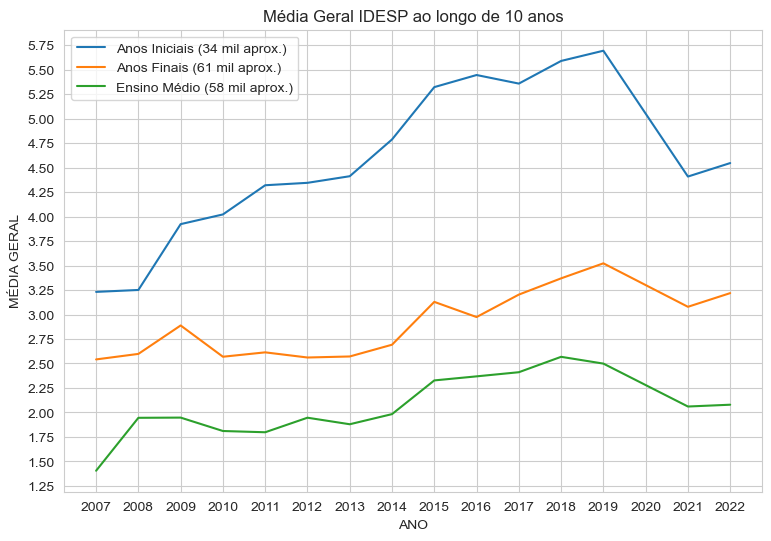

In [ ]:
mpl.figure(figsize=(9,6))

df_bckp_iniciais.plot(label='Anos Iniciais (34 mil aprox.)').yaxis.set_major_locator(mtick.MultipleLocator(0.25))
df_bckp_finais.plot(label='Anos Finais (61 mil aprox.)').yaxis.set_major_locator(mtick.MultipleLocator(0.25))
df_bckp_medio.plot(label='Ensino Médio (58 mil aprox.)').yaxis.set_major_locator(mtick.MultipleLocator(0.25))

mpl.title('Média Geral IDESP ao longo de 10 anos')
mpl.xticks(range(2007,2023))
mpl.ylabel('MÉDIA GERAL')

mpl.legend()
mpl.show()